# Predicting Modelling 1

Today, we will learn that machine learning is much less scary than science fiction will want us to believe. This is not because we have benevolent machines, which only want our best, but simply because these machines are quite far away from living their own life without our input, as Skynet manages in 'Terminator'. For the time being, machines still learn best when provided with human input. Furthermore, machines learn in most applications not because they want to start to understand the meaning of life and find out that humans are obstacles to true life, but because they learn to complete a particular task. Machines learn to be part of the workbenches of digital productions.

It is maybe less a link to artificial intelligence in science fiction than the fact that machines learn from our examples and need to be fed with large amounts of data to learn that makes machine learning an ethically difficult endeavour. Machine learning demands ever more data, which requires vast amounts of energy. Most aspects of our lives are recorded in vast data stores that are easily accessible to machines. Governments, businesses and individuals are recording and reporting all manners of information from the monumental to the mundane. As long as the activities can be transformed into digital formats, you can be certain that somebody will record it. 

In such a world, machines learn by consuming data and humans continuously add new digital methods of machine learning that can exploit this data. These can be some of the statistical methods we have already met or more advanced ones, we will meet today. The digital methods we learn about today have in common that they aim to predict new observations from old observations. They are all empirical and predictive using models.

Machine learning algorithms are all around you. They have tried to predict the outcomes of elections and referenda, can identify spam messages, predict crime and natural disasters, target donors and voters as well as finally have learned how to drive cars. Recently, they got it wrong quite often: http://www.kdnuggets.com/2016/11/trump-shows-limits-prediction.html

Many stories are told about the uses and abuses of machine learning. You can find some in the readings. Given how much machine learning is now part of our everyday life, it is maybe surprising that there are not even more stories. 

We also still lack an ethics of machine learning, which is developing so fast that it is difficult for laws and norms to stay up to date. There is, for instance, an on-going debate how biased machine learning algorithms are with regard to race and gender. Machine learning has also made it possible to identify people based on the region they live, the products they buy, etc. 

As a machine learning practitioner, you are often required to exclude revealing data that is ethically problematic. But this is not an easy task, as sometimes the connections are not obvious and might only be revealed after you have trained the machine to learn. 

We start with the same libraries. Run the cell below.

In [1]:
#Keep cell
import numpy as np
import pandas as pd
import seaborn as sns

## Background 1: The Data Science Process

### Social and cultural analytics and its data

Just like humans, machines use data to generalize. They abstract the data and develop its underlying principles, because humans tell them how. In the words of machine learning, machines form a model, which assigns meaning and represents knowledge. The model summarizes the data and makes explicit patterns among data. 

There are many different types of models. We have already seen some and others you will know from school. Models can be (statistical) equations, figures like graphs or trees, rules or clusters. Machines don't choose the type of models, we choose them for them when analysing the task at hand and the available data. 

The computer learns to fit the model to the data in a process called training. However, computational modelling does not end here. We also need to test the model in a separate testing process. The model thus does not include anything else but what can be found in the data already. It can nevertheless be interesting, as the model might surface connections that we did not recognize before. Newton discovered gravity this way by fitting a series of equations (a model) to observations of falling apples – if the myth is to be believed. Gravity was always there but it was observed for the first time in a model. Modelling is then never perfect. It generally involves some kind of bias or systematic error. Newton's laws of gravity are not as universal as he thought they would be. 

Errors like this do not have to be a bad thing, because they can lead the computer to be able to learn a better model, correcting previous mistakes. But generally, bias is to be avoided. All learning has weaknesses and is biased in a particular way. Researchers are still looking for the universal model that is better than the rest of them but will probably never find it. Therefore, it is really important to understand how a model can overcome bias. This is the purpose of testing it on new data.

Unfortunately, especially in our domain of social and cultural analytics, models often fall short of desirable performance. Humans are difficult for computers and their data is very noisy. This means that social and cultural data includes many errors because observations have not been measured correctly or maybe they are simply impossible to measure. How do you quantify, for instance, love? It seems impossible, but online match-making agencies still make a business out of predicting love. 

Humans are also inconsistent and report data wrongly. Finally, especially in history we simply do not have data for all time periods. Often, the records have simply been lost. Even if we have data, it will include many missing values or will be badly captured according to diverse and sometimes contradictory standards. 

A final complication with data in social and cultural analytics that has only recently emerged is the limited access we have to the data. Because it is so valuable, it is kept behind the walls of company servers and is not shared.

So, machine learning is not artificial intelligence yet but a laborious collaboration between humans and machines that involves trying models and fighting with (bad) data. Machine learning then leads to data science, which is a process that consists of a series of repeatable steps, which we will learn about today. Schutt and O'Neil (2013), have given us an excellent overview of the art of data science.

![alt text](images/process.png "The Art of Data Science ")

According to the Figure, we first need to collect (raw) data in a form that we can process it. The next step explores the data and cleans it. People in data science like to emphasize that this is about 80% of the whole work. Then, we need a question we would like to answer with the data. This question will of course be at the beginning of our work but will likely also change after the initial exploration. Based on the question and the exploration, we start with the model and train it using a subset of the data. After training, we need to evaluate the model's performance by running a series of test predictions against test data. The result of the evaluation will then be used to improve the model's performance iteratively until we are satisfied that the model performs as best as possible, and decisions can be confidently made.

Before we experience the art of machine learning and prediction, let's quickly remind ourselves of what data is in the eye of the machine. Data generally describes a series of observations, which in R are generally captured in the rows of a data frame. Each observation is defined by its features (characteristics), which are the columns of a data frame. If a feature represents a characteristic measured in numbers, it is unsurprisingly called numeric. For instance, the years of the State of the Union Speeches were numerical. Alternatively, if a feature measures an attribute that is represented by a set of categories, the feature is called categorical or nominal. For instance, the colour codes for red, green and blue are categorical. A special case of categorical variables is called ordinal, which designates a nominal variable with categories falling in an ordered list. Movie reviews on Netflix are, for instance, ordinal, because they only cover numbers from 1 to 5. 

You might also remember that we distinguished earlier supervised learning from unsupervised learning. We learned that clustering algorithms are an example of unsupervised learning where a machine discovers patterns/clusters in the data by itself. Today, we mainly work on the much larger group of supervised learning algorithms, where an algorithm is given a set of training data and then learns a combination of features that predicts certain behaviour such as whether an earthquake will take place soon or a crime will be committed. What we are trying to predict is also called a target variable. 

## Predicting Taste

Today, we will predict something that seems to define a human as inherently subjective. We will predict taste and in particular we will try to predict whether wine tastes good or bad. In the language of machine learning, this is a classification task. Our classification will predict whether any wine will fall into either one of two classes: good or bad wine. 

We will thus solve an ancient problem of philosophy, which interogates the subjectivity of taste or the aesthetic judgement (http://plato.stanford.edu/entries/aesthetic-judgment/). For the German philosopher Kant, taste judgments are universal and subjective at the same time. A key part of his Critique of Judgement, Kant demands more from taste than we are generally willing to attribute to it: 'Many things may for [a person] possess charm and agreeableness — no one cares about that; but when he puts a thing on a pedestal and calls it beautiful, he demands the same delight from others. He judges not merely for himself, but for all men, and then speaks of beauty as if it were a property of things. (…). He blames them if they judge differently, and denies them taste, which he still requires of them as something they ought to have; (…).' (http://oll.libertyfund.org/titles/kant-the-critique-of-judgement, §7). Today, we will use the machine to find out how something can be subjective and universal at the same time.

To illustrate how machines classify, let’s first go through a simplified dataset that helps us understand taste. Because we like it sweet and crunchy, we create a training dataset by tasting 1,000 foods and record for each of them how crunchy and how sweet they were. Both crunchy and sweet are ordinal features with a range from 1 to 10. Next, we would like to map this data into a so-called feature-space with 2-axes: one for crunchiness and one for sweetness. This example is taken from the excellent Lantz (2013) (Machine learning with R. Packt Publishing Ltd.)

Lantz produced a nice visualisation of such a feature space with a few example foods:
![alt text](images/lantz-1.png "")

Lantz notices that in this feature space 'similar types of food tend to be grouped closely together. (…), vegetables tend to be crunchy but not sweet, fruits tend to be sweet and either crunchy or not crunchy, while proteins tend to be neither crunchy nor sweet.' (p. 68). Similarity is thus based on the distance of the items in the feature space.
![alt text](images/lantz-2.png "")

Next, we taste for the first time a tomato and add it to the feature space.
![alt text](images/lantz-3.png "")

Based on this mapping how would we classify the tomato? Is it a vegetable or a fruit? The figure is not very conclusive because we cannot really determine which group the tomato is closer to in the feature space.

You have just learned how a machine would learn and think about the tomato as well as which decisions it would have to make to understand tomatoes. Machines learn similarities in feature spaces using distances.

## Identify the problem: Machine-tasting  Wines

Let's go next through our example of tasting wines next and explore the individual steps of machine learning more closely. The data comes from http://archive.ics.uci.edu/ml/. Check it out. It’s a famous repository for machine learning datasets. 

The wine data (http://archive.ics.uci.edu/ml/datasets/Wine+Quality) consists of 2 CSV files, one for white wines and another for red ones. The two datasets are related to red and white variants of the Portuguese Vinho Verde wine, and were first used in Cortez et al (2009) (Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4): 547-553).

I first thought of this example, when I learned that somebody else had already 'outsmarted' the best wine experts with machine learning: https://wineindustryinsight.com/?p=59721. Today, we try and reproduce this approach.

The first step for us is to download the data so that we can work with it. Let us repeat one more time the steps in detail. Perhaps the most common data format of freely available structured data are Comma-Separated Values (CSV) files, which, as the name suggests, uses the comma as a delimiter. CSV files can be imported to and exported from many common data repositories. To load CSV into Python, we use pandas read_csv() function. You use it by specifying a path to the file you want to import, e.g. /path/to/mydata.csv, when calling the pd.read_csv() function after importing pandas again. Here we use it to load the data directly from the web. Can you see how it is done? Also, for the first time we specify the delimiter=';', which separates the records.

### Collect Data

In [2]:
red = pd.read_csv(
     'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
white = pd.read_csv(
     'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

This creates two data frames, one for each type of wine. read_csv() directly accesses the data frames from the web, as you can see, because it uses an http address. Please, note that I generally would advise you to download the data first, as you can never be certain whether you will always have a working Internet connection.
As we would like to follow the work by Cortez et al. as closely as possible, we next add another feature/column to capture the colour of the wine.

Run `red['color'] = 'red'` to define a column called color in red that only contains the string 'red'.

In [3]:
red['color'] = 'red'

Now do the same thing for white, but here the value should be 'white'. Also print out the first could of rows in the data frame.

In [4]:
white['color'] = 'white'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Now we create single data frame for all the wines and declare that colour is factor. pd.concat is a function to bind two data frames row by row. You can also use to concat two data frame column by column with the axis parameter. Check out the specification online. Run `wines_df = pd.concat([white, red], ignore_index=True)`. With ignore_index=True, we make sure that the new data frame also has its own index.

In [5]:
wines_df = pd.concat([white, red], ignore_index=True)

This completes our first step, the data acquisition/collection. It is fairly easy, as we reuse existing material. The data is also complete, and we do not have to take care of any missing values. As described earlier, we want to the machine to learn how to taste good and bad wine. Let’s take a first look at the dataset using .info() first and then head(). Do you know how?

In [6]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


There is a column called quality, which matches our classification task. We will use this column as the classification 'target'. Quality is an ordinal feature from 1 to 9 with 9 indicating top quality. Now, let's see how quality values are distributed. We could simply run table to get the frequencies for each quality class, but we decide to plot the classes with `sns.histplot(data=wines_df, x='quality', binwidth=2)`. With binwidth=2, we include two classifications in each bin.

<AxesSubplot:xlabel='quality', ylabel='Count'>

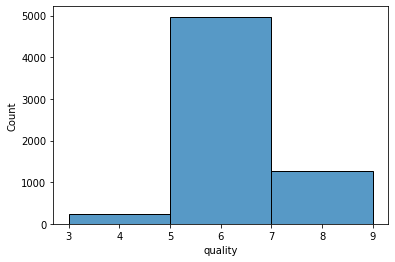

In [8]:
sns.histplot(data=wines_df, x='quality', binwidth=2)

In order to make our life a little easier, we now would like to reduce the 9 quality classes to 2 (good or bad). This is also part of the original example. Remember the magic of np.where? Then, you know that it is easy with `wines_df['quality'] = np.where(wines_df['quality'] < 6, 'bad', 'good')`.

In [9]:
wines_df['quality'] = np.where(wines_df['quality'] < 6, 'bad', 'good')

We have overwritten the original quality column with a new quality integer with 2 levels. Let’s see how this is distributed with value_counts(). Run `wines_df['quality'].value_counts()`.

In [10]:
wines_df['quality'].value_counts()

good    4113
bad     2384
Name: quality, dtype: int64

Unfortunately, we now have many more ‘good’ quality wine observations, which might be a problem later when we start training a model. Why do you think this might be the case? But it can’t be helped and we go on analysing.

It's time to prepare our data for its machine learning adventures.

### Prepare Data

The next step is very important for many machine learning algorithms based on feature spaces. We need to standardize the features, as the distances in the space are dependent on how the features are measured. In particular, if certain features have much larger values than others, the distance measurements will be strongly dominated by the larger values. This wasn't a problem for us before with the food data, as both sweetness and crunchiness were measured on a scale from 1 to 10. But suppose we added another measure on a scale from 1 to 1,000,000. This measure would dwarf the contribution of the other scales. The distances in the feature space would get out of scale.

We only need to normalize numeric data. Looking back at the results from str(wines_df), columns/features 1 to 11 are numeric. Next we, define a function to normalise these so that they are all on a scale between 0 and 1. We use the so-called min-max normalisation. Consider an example, where the residual sugar of wine is say 50, while we want to transform this to the range 0 to 1. So first we find the maximum value of residual sugar which is in our example 100 and the minimum value of residual sugar, say 20, then the new scaled value for will be: (50-20)/(100-20)=0.375. Can you see why this value is guaranteed to be between 0 and 1?

Let’s define a function that takes care of the normalization for us. You hopefully remember how you can define your functions in Python? Anyway, just look at the next cell and run it.

In [11]:
#Keep cell

def normalize(x):
    return ((x - x.min()) / (x.max() - x.min()))

Now, we apply normalize to all the numeric columns in wines_df. There is a wonderful function in Pandas to do this. Type in `wines_numeric_df = wines_df.select_dtypes(include='number')` and print out the first couple of rows.

In [12]:
# get all numeric columns
wines_numeric_df = wines_df.select_dtypes(include='number')
wines_numeric_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Apply is a powerful function in Pandas that let's you apply a function across seceral columns. Run:

```
wines_normalized_df = wines_numeric_df.apply(normalize)
wines_normalized_df.head()
```

In [13]:
wines_normalized_df = wines_numeric_df.apply(normalize)
wines_normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


Finally, let’s add the quality column to the new normalized data frame. This time it only contains good and bad. Type in:
```
wines_normalized_df['quality'] = wines_df['quality']
wines_normalized_df.head()
```

In [14]:
wines_normalized_df['quality'] = wines_df['quality']
wines_normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,good
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,good
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,good
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,good
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,good


We are now satisfied with the data, done our cleaning and all preparations. We can start the modelling process in order to predict how a wine will taste. But first we want to save the data after all the hard work. In Pandas, this means we pickle it: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html. Run `wines_normalized_df.to_pickle('data/wines_normalized_df.pkl')`.

In [15]:
wines_normalized_df.to_pickle('data/wines_normalized_df.pkl')

### Define the Training Data

From info() and value_counts(), we know that we have 6,497 wine quality observations with 2,384 labelled bad and 4,113 labelled good. Because we aim to predict new things, our next step should be to find out about things we do not already know and how the model would be able to predict unknown data. If we had access to more wine data, we could apply our model to unknown wine observations and see how well the predictions compare to new wines. But we cannot know about data we do not have. So, we simulate such a scenario by dividing our data into a training dataset that will be used to build the model and a test dataset. We will use the test dataset to simulate the prediction and find out how well our model behaves.

We will use 75% of our data for the training and 25% for testing. First, we randomly mix the data to ensure that all qualities are evenly distributed in both training and test data. Pandas has a function for that called sample. Create the training data with `train_set = wines_normalized_df.sample(frac=0.75)`. frac is the fraction of data to be included in the training data set.

In [16]:
train_set = wines_normalized_df.sample(frac=0.75)

We also need a test dataset. This will be simply the rest. So, we 'drop' everything from wines_normalized_df that is included in the training dataset. Run:
```
test_set = wines_normalized_df.drop(train_set.index)
test_set.info()
```

In [17]:
test_set = wines_normalized_df.drop(train_set.index)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 6495
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1624 non-null   float64
 1   volatile acidity      1624 non-null   float64
 2   citric acid           1624 non-null   float64
 3   residual sugar        1624 non-null   float64
 4   chlorides             1624 non-null   float64
 5   free sulfur dioxide   1624 non-null   float64
 6   total sulfur dioxide  1624 non-null   float64
 7   density               1624 non-null   float64
 8   pH                    1624 non-null   float64
 9   sulphates             1624 non-null   float64
 10  alcohol               1624 non-null   float64
 11  quality               1624 non-null   object 
dtypes: float64(11), object(1)
memory usage: 164.9+ KB


We are ready to model and because things are looking good with go directly to one the most advanced machine learning technique that uses the human brain as an inspiration. Neural Networks have become synonymous with the recent success of artificial intelligence. 

## Modelling and Predicting 

### Background 2: Neural Networks

With the training data, we are ready to start learning a model for tasting wine. To classify our test instance, we will work with the best that current machine learning has to offer. We employ the help of neural networks, machines assembled in similar ways to the hundreds, thousands or millions of brain cells. Kant would be proud of us – maybe. 
![alt text](images/neural-networks-1.png "")

Each neuron is made up of a cell body with a number of connections coming off it. These are numerous dendrites (carrying information toward the cell body) and a single axon (carrying information away). But computers are not alive. They are mechanical boxes and made not of the complex chains of brain cells, which are densely interconnected in complex and parallel ways - each one connected to perhaps 10,000 other brain cells. Computers are designed to store lots of data and rearrange that – as we have done many times and need instructions for that. To the day, we do not fully understand how brains learn. They can spontaneously put information together in astounding new ways and forge new connections. No computer currently comes close to that.

The basic idea behind a neural network is to simulate those densely interconnected brain cells inside a computer so you can get it to learn things, recognize patterns and make decisions. Neural networks learn to improve their own analysis of the data. But neural networks remain mathematical equations and mean nothing to the computers themselves – unlike our own brain activities. They are still just highly interconnected numbers in boxes who constantly change. 

A typical neural network has anything from a few dozen to hundreds, thousands, or even millions of artificial neurons called units arranged in a series of layers, each of which connects to the layers on either side. Some of them are input units. In our case, these will be defined by the data for each feature in each observation. Each feature forms one input unit. Neural networks also have an output layer that responds to the information that is learned. In our case, these are the quality judgments we make with regard to the wines. 
![alt text](images/neural-networks-2.png "")

In-between the input units and output units are one or more layers of hidden units, which together form the majority of the artificial brain. The connections between one unit and another are represented by a number called a weight, which can be either positive (if one unit excites another) or negative (if one unit suppresses or inhibits another). The higher the weight, the more influence one unit has on another. Inputs are fed in from the left, activate the hidden units in the middle and feed out outputs from the right.

But information flows backwards from the output units, too. For a neural network to learn, there has to be an element of feedback involved – just like we humans learn. With feedback, we compare what we tried to achieve with what we actually achieved and adjust our behaviour accordingly. Neural networks learn things in exactly the same way with a feedback process called backpropagation. Because we know from the training data the output we tried to achieve, we can compare it with the calculated values and modify the connections in the network to improve the outcome, working from the output units through the hidden units to the input units. Over time, this backpropagation causes the network to learn until a stable state is achieved. In our case, the network will learn how we taste wine.

### Modelling and Predicting

Fortunately for us, we do not have to implement Neural Networks by ourselves but can rely on many existing algorithms in Python. 

One of the most common machine learning libraries in Python used is scikit-learn: https://scikit-learn.org/. We will use scikit's MLP-classifier, a Multi-layer Perceptron classifier. Perceptron are basically these little mathematical entities that are supposed to simulate the human brain cells: https://en.wikipedia.org/wiki/Perceptron. They can be multi-layered to form very complex networks. Run the next cell to load the necessary libraries.

In [18]:
#Keep cell

import sklearn as sk
from sklearn.neural_network import MLPClassifier

We first divide our train and test set into predictor and target variables.  The next cell is very typical to all machine learning work. For each of the two training and test datasets, it creates the part that is everything except the target variable (X) and the target variable (y). Run:

```
X_train = train_set.loc[:, train_set.columns != 'quality'].values
y_train = train_set['quality'].values

X_test = test_set.loc[:, test_set.columns != 'quality'].values
y_test = test_set['quality'].values
```
Remember that values transforms a Pandas series into an array. The rest of the syntax is hopefully clear?

In [19]:
X_train = train_set.loc[:, train_set.columns != 'quality'].values
y_train = train_set['quality'].values

X_test = test_set.loc[:, test_set.columns != 'quality'].values
y_test = test_set['quality'].values

And then build the classifier. https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/ has nice instructions. Type in `classifier = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300)`, which defines an MLP with two hidden layers of 20 and then 10 nodes. max_iter=300 tells the modelling to stop after 300 iterations. 

In [20]:
model = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=300)

In the Python machine learning pipeline, we now need to 'fit' the model with the training data. Run `model.fit(X_train, Y_train)` to do so. 

In [21]:
model.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=300)

Run the next two cells to get an insight into how the model is consituted. The first cell prints out some of the weights attached to the neuron links and the second visualises the whole network.

In [22]:
#Keep cell

print("Weights between input and first hidden layer:")
print(model.coefs_[0][:3])
print("\nWeights between first hidden and second hidden layer:")
print(model.coefs_[1][:3])

Weights between input and first hidden layer:
[[ 3.15914102e-001  6.27310599e-001  9.55514459e-002 -7.03734652e-001
  -2.29057455e-002  2.48032413e-003  1.96476263e-001 -2.77679019e-003
  -4.24140770e-001 -7.73217575e-124  3.07337392e-001 -4.75301509e-001
   1.52330906e-001  2.36834433e-001 -4.05328318e-001 -8.33122602e-001
  -8.66220522e-002  1.10290161e-002 -7.93881705e-001  4.86561621e-001]
 [-5.83626108e-001  7.34469566e-001  2.86272092e-001  1.66447911e-001
   7.53931984e-001  4.99782934e-001 -1.18890846e+000  5.58046923e-001
  -2.89011067e-001 -8.98704300e-127  6.08696710e-001 -7.54053735e-001
  -8.88652436e-002  5.94620542e-001 -2.77746274e-001  4.53992711e-001
  -4.16388675e-001  5.01886717e-001  2.83650331e-001  6.12545454e-001]
 [-2.49994312e-001 -2.97866638e-001 -4.83342065e-002 -4.39805326e-001
  -4.27413605e-003  4.19780983e-001 -1.53447518e-001  1.61738953e-001
   2.67697651e-002  1.11470779e-126  1.98955068e-001  1.77821247e-001
  -2.68737754e-001  1.40168284e-001  6.847

In [23]:
#Keep cell

import VisualizeNN as VisNN

input_features = 11
output_features = 1
network_structure = np.hstack(([input_features], np.asarray(model.hidden_layer_sizes), [output_features]))

network=VisNN.DrawNN(network_structure, model.coefs_)
network.draw()

ModuleNotFoundError: No module named 'palettable'

The blue connections are negative weights and the orange ones are positive.

### Predicting 

Next, we can start predicting unknown behaviour, which - as said - we simulate with the test dataset. Run `y_pred = model.predict(X_test)`.

In [24]:
y_pred = model.predict(X_test)

Let's check out the details of our predictions and compare predictions with test data using scikit's confusion matrix function which prints the true positives, false negatives, false positives an true negatives consequently. Don't know what those are? Check out: https://en.wikipedia.org/wiki/False_positives_and_false_negatives.

Run the next cell.

## Evaluate Model

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[358, 154],
       [225, 887]])

Check https://en.wikipedia.org/wiki/Confusion_matrix for how to read this matrix but also don't worry, we will make a nicer representation. For the moment, we are only interested in the overall performance by looking at the accuracy of our prediction.

Accuracy is defined as the number of times our predictions have been correct compared to the overall number of predictions. So, we take all cases where the predictions where right in the above table (bad-bad and good-good) and compare these with the overall number of observations in the test data or len(test_set). Please replace in the calculation below the numbers you have got.

In [26]:
(355 + 875) / len(test_set)

0.7573891625615764

~75% of our predictions are correct. Please, note that the exact number can be either a bit higher or lower depending on the random test and training datasets. 

Not bad – especially considering that most wine experts would probably not be able to agree to such a degree. However, we would of course like to improve on our predictions. So, let's investigate this further. 

But first let's make this better. Run the next cell for a visualisation of the confusion matrix.

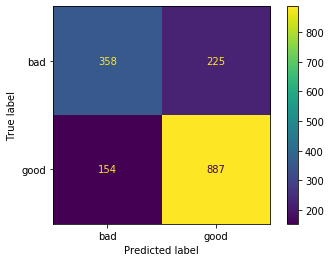

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test) 

From the matrix, we can see that the machine is much better at predicting good quality wine rather than bad one. This should not be surprising, since we already know that we do not have enough training data for bad wine. 

### Interpret the Results

In order to further interpret the model, a good approach is to understand which features have influenced the models behaviour and which features are redundant because the results they support are supported by other features. This way we get closer to the secret why people like certain wines. Let's find out first which features influence the quality decisions most. 

Model interpretation is a big research topics at the moment (https://medium.com/analytics-vidhya/why-should-i-trust-your-model-bdda6be94c6f). It is a whole new research area called trusted/explainable AI. We will use an algorithm called PermutationImportance, which checks how important a feature is based on permutating the order of the features. ELI5 stands for the phrase: Explain Like I'm 5. It is also one of the standard Python to explain models. 

Run the cell below to load the library.

In [28]:
#Keep cell

import eli5
from eli5.sklearn import PermutationImportance

In order to print out the table of feature importance, run:
```
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names =list(wines_numeric_df.columns))
```

In [29]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names =list(wines_numeric_df.columns))

Weight,Feature
0.1202 ± 0.0108,alcohol
0.0946 ± 0.0059,volatile acidity
0.0292 ± 0.0118,residual sugar
0.0241 ± 0.0076,free sulfur dioxide
0.0175 ± 0.0087,total sulfur dioxide
0.0132 ± 0.0065,sulphates
0.0083 ± 0.0042,fixed acidity
0.0058 ± 0.0080,chlorides
-0.0001 ± 0.0068,density
-0.0004 ± 0.0106,pH


To plot this output, we need to transform it into a data frame first. We can do this in one line. Run and understand the cell below.

In [31]:
#Keep cell
features = pd.DataFrame(list(zip(wines_numeric_df.columns, perm.feature_importances_)), columns = ['Feature', 'Importance'])
features

,Feature,Importance
0,fixed acidity,0.008251
1,volatile acidity,0.094581
2,citric acid,-0.003818
3,residual sugar,0.029187
4,chlorides,0.005788
5,free sulfur dioxide,0.024138
6,total sulfur dioxide,0.017488
7,density,-0.000123
8,pH,-0.000369
9,sulphates,0.013177


With Pandas' sort_values(), you can order features according to the their importance. Can you find out how? Tip: use ascending=False and inplace = True as parameters.

In [32]:
features.sort_values(['Importance'], ascending=False, inplace = True)

You can plot features with `sns.barplot(x='Importance', y='Feature', data=features)`.
This will be a horizontal plot as we set x to the numerical variable and y to the categorical one.

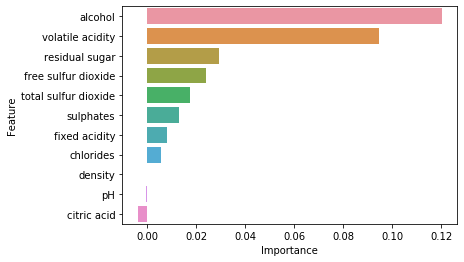

In [33]:
sns.barplot(x='Importance', y='Feature', data=features)

## Feature engineering


Feature engineering is a big topic, which we skipped over a bit. According to https://en.wikipedia.org/wiki/Feature_engineering, it is the 'process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.' For example, we could reduce the features, as not all of them are equally important according to our feature  plot. Or, in order to check for redundant features that we do not need for the prediction, we can use correlation for numerical features. Remember that a correlation indicates the extent to which two or more features fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel. The higher the correlation between variables therefore the easier it will be to use just one of them, as the others do not influence the overall outcome. Correlation can also be an issue for the use of explainability tools, according to https://towardsdatascience.com/stop-permuting-features-c1412e31b63f.

We will plot a heatmap of the correlations using seaborn. The correlation coefficient has values between -1 to 1. A value closer to 0 implies weaker correlation (exact 0 implying no correlation). A value closer to 1 implies stronger positive correlation. A value closer to -1 implies stronger negative correlation. 

Run `cor = train_set.corr()` to determine the correlations. Also print out cor ...

In [34]:
cor = train_set.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219097,0.333427,-0.116167,0.300929,-0.270196,-0.328078,0.466703,-0.262551,0.300988,-0.092746
volatile acidity,0.219097,1.000000,-0.384367,-0.208628,0.388007,-0.356587,-0.418821,0.273349,0.254036,0.236937,-0.042823
citric acid,0.333427,-0.384367,1.000000,0.147263,0.029079,0.135333,0.193723,0.097812,-0.336931,0.049565,-0.009222
residual sugar,-0.116167,-0.208628,0.147263,1.000000,-0.126122,0.408634,0.503564,0.536663,-0.265492,-0.191135,-0.364692
chlorides,0.300929,0.388007,0.029079,-0.126122,1.000000,-0.193219,-0.283269,0.375775,0.048082,0.399786,-0.252958
free sulfur dioxide,-0.270196,-0.356587,0.135333,0.408634,-0.193219,1.000000,0.721461,0.027101,-0.140270,-0.189320,-0.173523
total sulfur dioxide,-0.328078,-0.418821,0.193723,0.503564,-0.283269,0.721461,1.000000,0.028379,-0.230484,-0.280665,-0.263724
density,0.466703,0.273349,0.097812,0.536663,0.375775,0.027101,0.028379,1.000000,0.009430,0.267748,-0.695710
pH,-0.262551,0.254036,-0.336931,-0.265492,0.048082,-0.140270,-0.230484,0.009430,1.000000,0.197012,0.116228
sulphates,0.300988,0.236937,0.049565,-0.191135,0.399786,-0.189320,-0.280665,0.267748,0.197012,1.000000,-0.005169


The table shows how two features are correlated. At the moment, nothing really stands out, but let's plot the table as a heatmap to get a better overview.

Run the cell below.

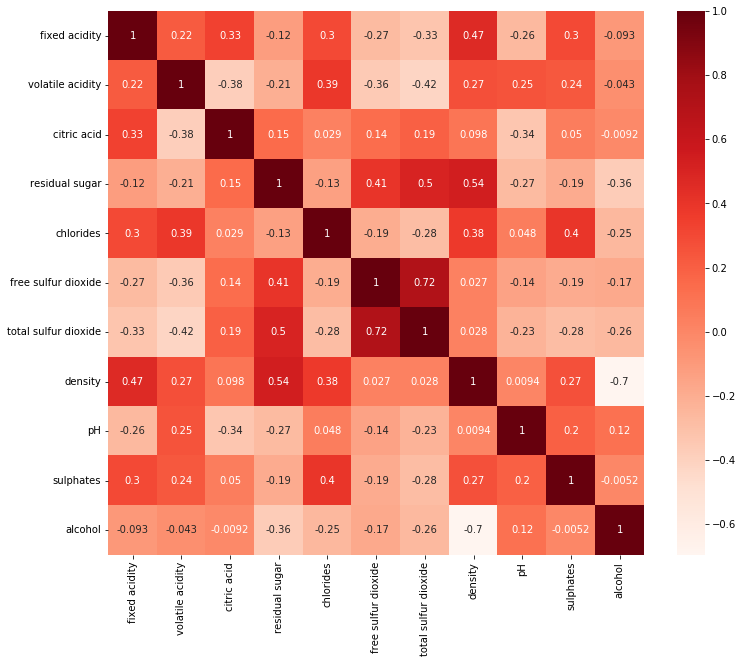

In [35]:
#Keep cell
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

corr() delivers the correlations between all features in train_set and sns.heatmap plots them. In the plot, you can clearly see that the two sulfur.dioxide measures are correlated. A negative correlation indicates the extent to which one variable increases as the other decreases. 

The next step would be to try and improve the model performance. We could, for instance, make the neural network more complex or change the normalisation. The possibilities are literally endless. This kind of work is what keeps an analyst really occupied. In our case this might be difficult though as we do not have enough data on bad wines. We could try and get more data and organise another tasting competition, but going to Portugal is expensive. We rather look at a recent innovation of the neural network called 'deep learning' next. Deep learning is essentially a way to learn much more complex neural network architectures, more layers of hidden neurons and more complex connections. 